In [9]:
# exercise 11.1.1
from matplotlib.pyplot import figure, plot, legend, xlabel, show
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture

# Load Matlab data file and extract variables of interest
#mat_data = loadmat('./data/synth2.mat')
mat_data = loadmat('./data/synth1.mat')

X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
#X_old = X
#X = np.hstack([X,X])
N, M = X.shape
C = len(classNames)

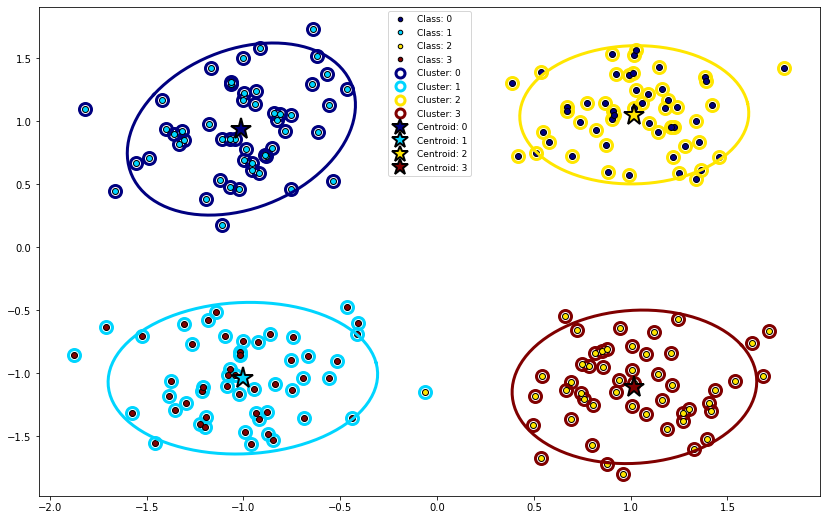

Ran Exercise 11.1.1


In [10]:
# Number of clusters
K = 4
# type of covariance, you can try out 'diag' as well
cov_type = 'full' # e.g. 'full' or 'diag'

# define the initialization procedure (initial value of means)
initialization_method = 'random'#  'random' or 'kmeans'
# random signifies random initiation, kmeans means we run a K-means and use the
# result as the starting point. K-means might converge faster/better than  
# random, but might also cause the algorithm to be stuck in a poor local minimum 

# number of fits with different initalizations, best result will be kept
reps = 10

# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps, 
                      tol=1e-6, reg_covar=1e-6, init_params=initialization_method).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
figure(figsize=(14,9))
clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
show()

## In case the number of features != 2, then a subset of features most be plotted instead.
#figure(figsize=(14,9))
#idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
#clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
#show()

print('Ran Exercise 11.1.1')

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6


D:\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 3 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Fitting model for K=7
Fitting model for K=8


D:\Anaconda3\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 3 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Fitting model for K=9
Fitting model for K=10


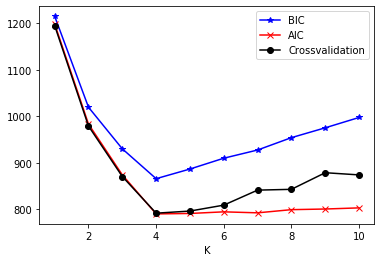

Ran Exercise 11.1.5


In [8]:
from sklearn import model_selection

# Range of K's to try
KRange = range(1,11)
T = len(KRange)

covar_type = 'full'       # you can try out 'diag' as well
reps = 3                  # number of fits with different initalizations, best result will be kept
init_procedure = 'kmeans' # 'kmeans' or 'random'

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, 
                              n_init=reps, init_params=init_procedure,
                              tol=1e-6, reg_covar=1e-6).fit(X)
        
        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, BIC,'-*b')
plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'AIC', 'Crossvalidation'])
xlabel('K')
show()

print('Ran Exercise 11.1.5')